<a href="https://colab.research.google.com/github/AlexxLai/ml0716/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# iris
df = pd.DataFrame(iris["data"],columns = iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv",encoding = "utf-8",index = False) # index是最前項的0,1,2,...的值
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
from sklearn.model_selection import train_test_split # 設計測試資料集，引入此套件
# [90% data , 10% data , 90% target , 10% target]
x_train,x_test,y_train,y_test = train_test_split(iris["data"],
                                                iris["target"],
                                                test_size = 0.1 # 依照位置切割比例
                                                              )


array([1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2])

In [12]:
from sklearn.tree import DecisionTreeClassifier # 引入決策樹套件
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

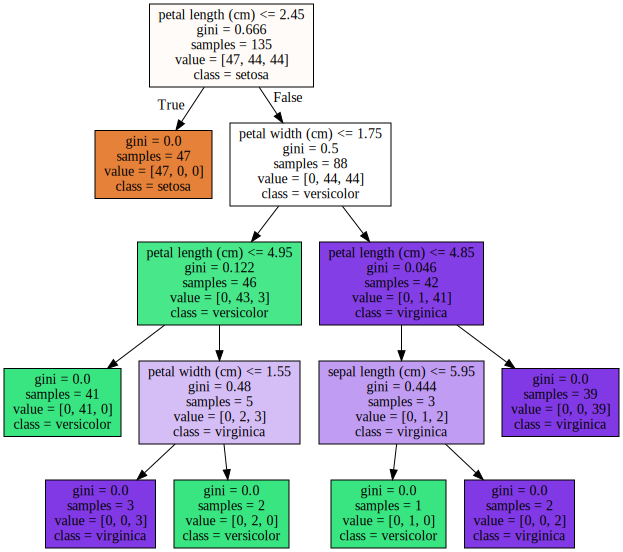

In [13]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf,
                    feature_names = iris["feature_names"],
                    class_names = iris["target_names"],
                    filled = True # 顏色
                    )
graphviz.Source(g)

In [16]:
from sklearn.metrics import accuracy_score # 利用此套件預測正確率
pre = clf.predict(x_test)
accuracy_score(pre,y_test)

0.8666666666666667